# Assignment 6 - Weather

***

In this notebook various plots are created using weather data obtained from a URL. The aim is to plot:
- The temperature
- The mean temperature each day
- The mean temperature for each month
- The Windspeed
- The rolling windspeed (over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds

In [153]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
# Define the URL where the CSV is stored
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# Load the data from the URL into a DataFrame
df = pd.read_csv(url, skiprows=22, low_memory=False)

Had to skip metadata header rows (22). 

- https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/

Adding the option "low_memory=False" helped read in the rows which have different combinations of datatypes fro some reason.

- https://www.geeksforgeeks.org/pandas-read_csv-low_memory-and-dtype-options/

That might be deprecated though

- https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [155]:
# Display a few lines of the head of the dataframe
df.head(5)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [156]:
# View the first row in the dataframe
df.iloc[0]

date     10-apr-1996 14:00
ind                      0
rain                   0.0
ind.1                    0
temp                  11.5
ind.2                    0
wetb                   8.1
dewpt                  3.9
vappr                  0.0
rhum                     0
msl                 1016.7
ind.3                    0
wdsp                     0
ind.4                    0
wddir                    0
ww                      25
w                       81
sun                    0.0
vis                  35000
clht                    32
clamt                    5
Name: 0, dtype: object

Lets clean the data up a bit, format etc.

In [157]:
# Check datatypes 
df.dtypes

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object

In [158]:
# Convert all columns to numeric, except the 'date' column
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.name != 'date' else x)

In [159]:
# Check datatypes again
df.dtypes

date      object
ind        int64
rain     float64
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl      float64
ind.3      int64
wdsp     float64
ind.4      int64
wddir    float64
ww       float64
w        float64
sun      float64
vis      float64
clht     float64
clamt    float64
dtype: object

In [160]:
# Check how many missing entries in each column
df.isna().sum()

date         0
ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       55486
w        55487
sun          0
vis      62581
clht        18
clamt       18
dtype: int64

In [161]:
# Drop empties
df.dropna(inplace=True)

In [162]:
# Check how many missing entries in each column
df.isna().sum()

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64

In [163]:
# Have a look at the date column
print(df['date'])

0         10-apr-1996 14:00
1         31-jul-1996 08:00
2         31-jul-1996 09:00
3         31-jul-1996 10:00
4         31-jul-1996 11:00
                ...        
248379    30-nov-2024 10:00
248380    30-nov-2024 11:00
248381    30-nov-2024 12:00
248382    30-nov-2024 13:00
248383    30-nov-2024 14:00
Name: date, Length: 185737, dtype: object


Now we convert the date column to pandas datetime format, making it easy to work with.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

- https://www.geeksforgeeks.org/python-pandas-to_datetime/

In [164]:
# Convert the 'date' column to datetime format, specifying the current format in the CSV
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')

In [165]:
# Check date column after conversion to DateTime format
print(df['date'])

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
248379   2024-11-30 10:00:00
248380   2024-11-30 11:00:00
248381   2024-11-30 12:00:00
248382   2024-11-30 13:00:00
248383   2024-11-30 14:00:00
Name: date, Length: 185737, dtype: datetime64[ns]


## Plotting

We can create plots quickly and easily using pandas built-in plotting tools.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

<Axes: title={'center': 'Temperature Over Time'}, xlabel='Date', ylabel='Temperature (C)'>

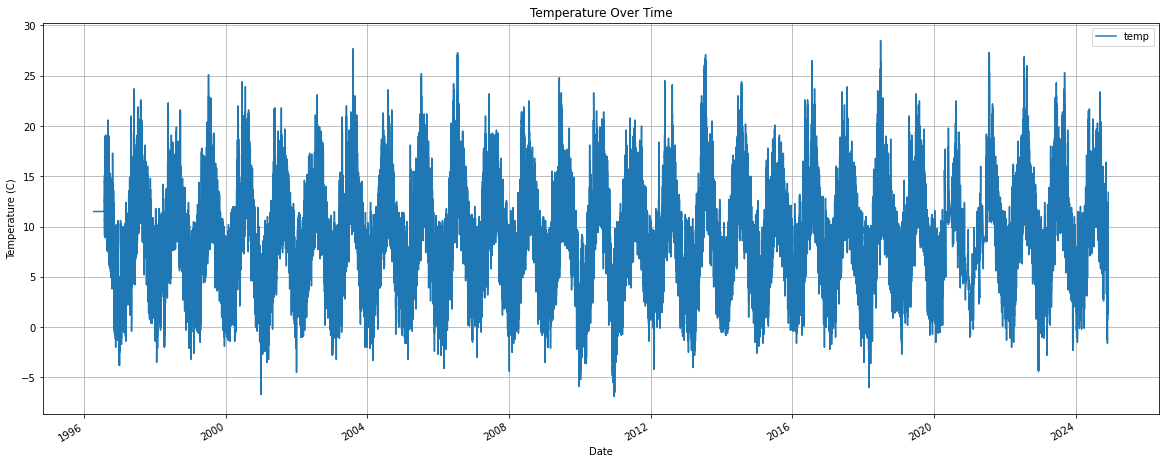

In [166]:
# Plot temp over time
df.plot(
    x='date',
    y='temp',
    kind='line',
    title='Temperature Over Time',
    xlabel='Date',
    ylabel='Temperature (C)',
    figsize=(20, 8),
    grid=True
    )

To plot averages we use the groupby() method, an example of grouping by year found below:

- https://www.statology.org/pandas-group-by-year/

### Daily Mean Temperature

Now to plot the mean temperature each day. We can use pandas groupby() function.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

Group by day:

- https://stackoverflow.com/questions/39400115/python-pandas-group-by-date-using-datetime-data

In [167]:
# Group by 'date' and calculate the mean temperature for each day
daily_mean_temp = df.groupby(df['date'].dt.date)['temp'].mean()

<Axes: title={'center': 'Daily Mean Temperature'}, xlabel='Date', ylabel='Mean Temperature (C)'>

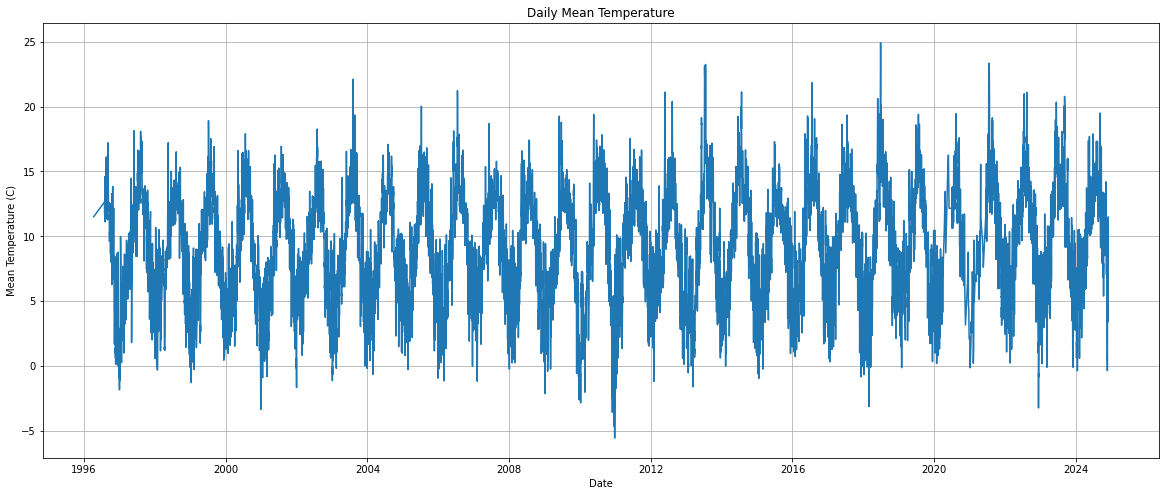

In [168]:
# Plot the daily mean temperature
daily_mean_temp.plot(
    kind='line',
    title='Daily Mean Temperature',
    xlabel='Date',
    ylabel='Mean Temperature (C)',
    figsize=(20, 8),
    grid=True,
    )

### Monthly Mean Temperature

In [169]:
# Group by month and calculate the mean temperature for each month
monthly_mean_temp = df.groupby(df['date'].dt.to_period('M'))['temp'].mean()

<Axes: title={'center': 'Monthly Mean Temperature'}, xlabel='Month', ylabel='Mean Temperature (C)'>

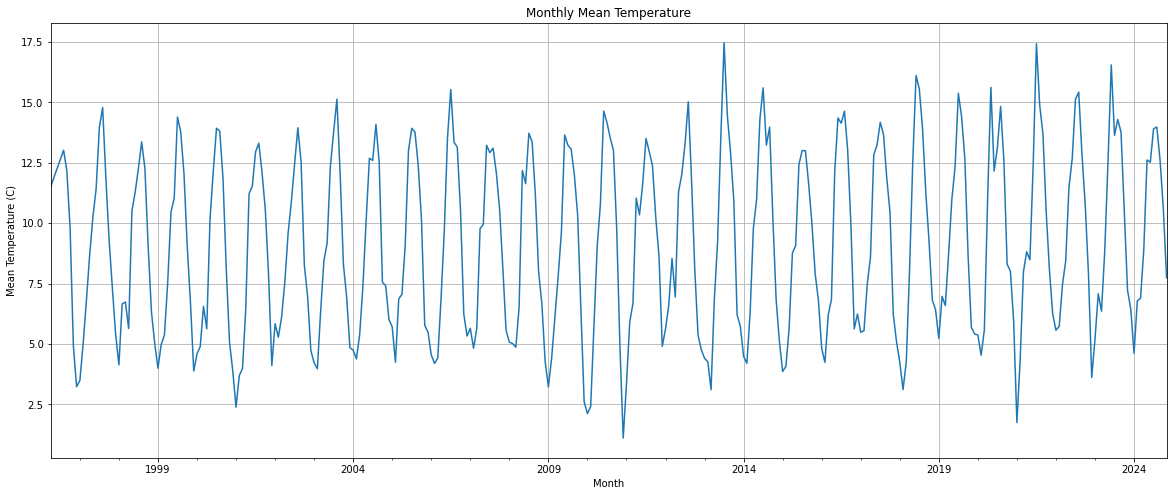

In [ ]:
# Plot the monthly mean temperature
monthly_mean_temp.plot(
    kind='line',
    title='Monthly Mean Temperature',
    xlabel='Month',
    ylabel='Mean Temperature (C)',
    figsize=(20, 8),
    grid=True
    )

### Yearly Average Temperature

In [171]:
# Group by the year and get the mean temperature
yearly_mean_temp = df.groupby(df['date'].dt.year)['temp'].mean()

<Axes: title={'center': 'Yearly Mean Temperature'}, xlabel='Year', ylabel='Mean Temperature (C)'>

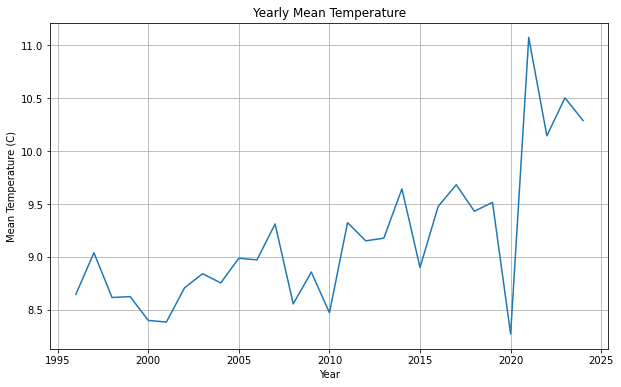

In [172]:
# Plot the yearly mean temperature
yearly_mean_temp.plot(
    kind='line',
    title='Yearly Mean Temperature',
    xlabel='Year',
    ylabel='Mean Temperature (C)',
    figsize=(10, 6),
    grid=True
    )

In the plot above we can see the "Big Freeze" of 2010!

### Windspeed

<Axes: title={'center': 'Windspeed Over Time'}, xlabel='Date', ylabel='Windspeed (knots)'>

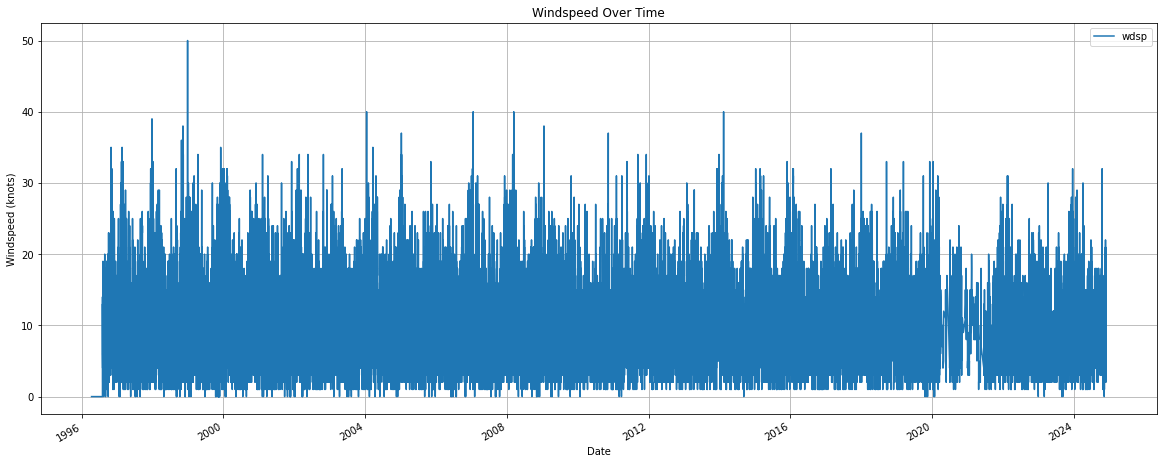

In [173]:
# Plot windspeed over time
df.plot(
    x='date',
    y='wdsp',
    kind='line',
    title='Windspeed Over Time',
    xlabel='Date',
    ylabel='Windspeed (knots)',
    figsize=(20, 8),
    grid=True
    )

### Rolling Windspeed

Matplotlib is more powerful, and more customizable.

In [174]:
# Calculate the 24-hour rolling average of windspeed
df['rolling_wdsp'] = df['wdsp'].rolling(window=24).mean()

We need to set the date colummn as the index when calculating rolling averages:

In [175]:
# Set the index to datetime
df.set_index('date', inplace=True)

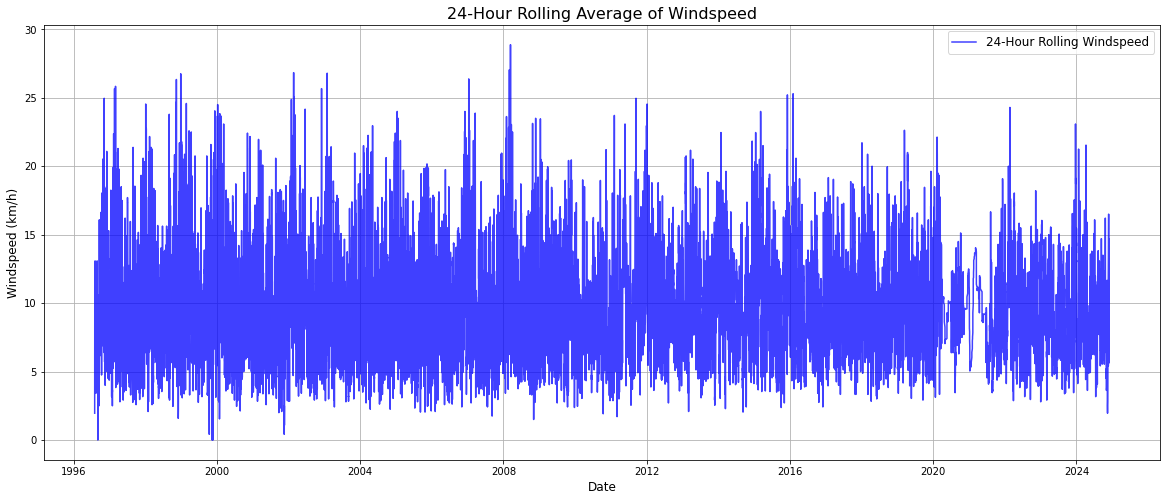

In [ ]:
# Plot the rolling average
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(df.index, df['rolling_wdsp'], label='24-Hour Rolling Windspeed', color='blue', alpha=0.75)
ax.set_title('24-Hour Rolling Average of Windspeed', fontsize=16)

# Decorate the plot
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Windspeed (km/h)', fontsize=12)
ax.grid(True)
ax.legend(fontsize=12)

# Unset the index (or plots later are messed up)
df.reset_index(inplace=True)

### Max windspeed each day

In [177]:
# Group by day and calculate the maximum windspeed for each day
daily_max_windspeed = df.groupby(df['date'].dt.date)['wdsp'].max()

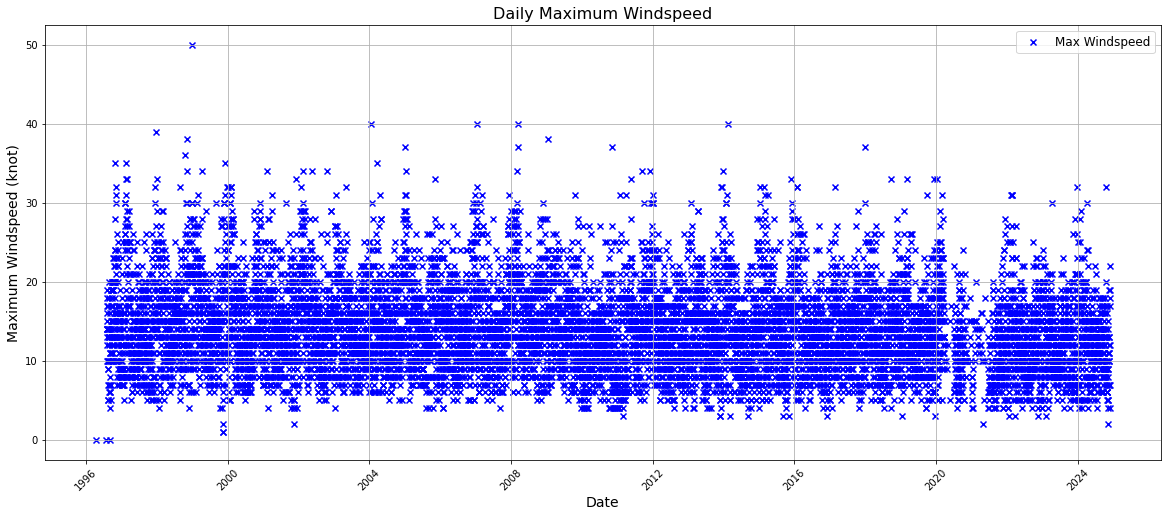

In [ ]:
# Set up figure, axis
fig, ax = plt.subplots(figsize=(20, 8))

# Scatter plot for daily maximum windspeed
ax.scatter(
    daily_max_windspeed.index, 
    daily_max_windspeed.values, 
    label='Max Windspeed', 
    color='blue', 
    marker='x'
    )

# Decorate the plot
ax.set_title('Daily Maximum Windspeed', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Maximum Windspeed (knot)', fontsize=14)
ax.grid(True)
plt.xticks(rotation=45, fontsize=10)

# Add legend
ax.legend(fontsize=12)

### Monthly Mean of Daily Max Windspeed

In [179]:
# ...

***

### END